# Bike Sharing Data Exploration
## by Noah Akachi

## Introduction
> This document explores a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area including the time, location, staion name,bike ID, user type and user gender for approximately 180,000 records of people who used bike sharing in a region for their transportation.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset
bike=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# show basic overview of the data
print(bike.shape)
bike.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# get data info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# locate null values in the dataset
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# look closer at the start_station_longitude column
bike['start_station_longitude'].head()

0   -122.400811
1   -122.391034
2   -122.426826
3   -122.446546
4   -122.271738
Name: start_station_longitude, dtype: float64

In [7]:
s = bike['start_station_longitude'].astype(str)

e = bike['end_station_longitude'].astype(str)

def strip_char(x):
    return x.strip()[1:]
    

bike['start_station_longitude'] = e.apply(strip_char)
bike['end_station_longitude'] = e.apply(strip_char)

In [8]:
# confirm the changes
bike['start_station_longitude'].head()

0            122.402923
1             122.39317
2    122.40490436553954
3    122.44429260492323
4           122.2487796
Name: start_station_longitude, dtype: object

In [9]:
# confirm the changes
bike['start_station_longitude'].head()

0            122.402923
1             122.39317
2    122.40490436553954
3    122.44429260492323
4           122.2487796
Name: start_station_longitude, dtype: object

In [10]:
# convert the column to a float
bike['start_station_longitude']=bike['start_station_longitude'].astype(float)

In [11]:
# convert the column to a float
bike['end_station_longitude']=bike['end_station_longitude'].astype(float)

In [12]:
# engineer the distance from the longitude and latitude of the start and end location
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


for index, row in bike.iterrows():
    bike.loc[index, 'distance'] = haversine(row['start_station_longitude'], row['start_station_latitude'], row['end_station_longitude'], row['end_station_latitude'])

In [13]:
# engineer the suration in min from the seconds column
bike['duration_min'] = bike['duration_sec'] /60

In [14]:
# convert the minutes duration column data tyoe to ine
bike['duration_min'] = bike['duration_min'].astype(int)

In [15]:
# convert the start time column to datatime data type
bike['start_time'] = pd.to_datetime(bike['start_time'])

In [16]:
# convert the end time column to datatime data type
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [17]:
# get the day from the start date 
dow_map={0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday' }

bike['day_of_week'] = bike['start_time'].dt.dayofweek.map(dow_map)

In [18]:
bike['member_birth_year'].replace(1878.0, 1978.0, inplace=True)

In [19]:
# drop all null values in the dataset
bike=bike.dropna()

In [20]:
# convert the year datatype to int
bike['member_birth_year'] = bike['member_birth_year'].astype(int)

In [21]:
# records where age is older than 100 is probably error and is dropped
above_max_age = bike[bike['member_birth_year'] <= (2022-100)].index
bike.drop(above_max_age, inplace=True)

In [22]:
# confirm changes
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174878 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174878 non-null  int64         
 1   start_time               174878 non-null  datetime64[ns]
 2   end_time                 174878 non-null  datetime64[ns]
 3   start_station_id         174878 non-null  float64       
 4   start_station_name       174878 non-null  object        
 5   start_station_latitude   174878 non-null  float64       
 6   start_station_longitude  174878 non-null  float64       
 7   end_station_id           174878 non-null  float64       
 8   end_station_name         174878 non-null  object        
 9   end_station_latitude     174878 non-null  float64       
 10  end_station_longitude    174878 non-null  float64       
 11  bike_id                  174878 non-null  int64         
 12  user_type       

In [23]:
# engineer the age from the birth year column
bike['age'] = 2022 - bike['member_birth_year']

In [24]:
# confirm changes
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,122.402923,13.0,Commercial St at Montgomery St,37.794231,122.402923,4902,Customer,1984,Male,No,0.511798,869,Thursday,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,122.404904,5905,Customer,1972,Male,No,1.896902,1030,Thursday,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,122.444293,70.0,Central Ave at Fell St,37.773311,122.444293,6638,Subscriber,1989,Other,No,0.169512,608,Thursday,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,122.248780,222.0,10th Ave at E 15th St,37.792714,122.248780,4898,Subscriber,1974,Male,Yes,1.316616,26,Thursday,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,122.405950,323.0,Broadway at Kearny,37.798014,122.405950,5200,Subscriber,1959,Male,No,3.067747,29,Thursday,63


In [25]:
# drop columns that will not be need for the exploration to answer the research question
bike.drop(['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude',
          'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude',
          'bike_id', 'member_birth_year'], axis=1, inplace=True)

In [26]:
# format the distance column to 2 dp
bike['distance'] = bike['distance'].round(decimals=2)

In [27]:
# confirm changes
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174878 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_name       174878 non-null  object 
 1   end_station_name         174878 non-null  object 
 2   user_type                174878 non-null  object 
 3   member_gender            174878 non-null  object 
 4   bike_share_for_all_trip  174878 non-null  object 
 5   distance                 174878 non-null  float64
 6   duration_min             174878 non-null  int32  
 7   day_of_week              174878 non-null  object 
 8   age                      174878 non-null  int32  
dtypes: float64(1), int32(2), object(6)
memory usage: 12.0+ MB


In [28]:
bike.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [29]:
# convert the day of week to an ordered categorical variable of type weekday ordered from sunday to saturday
weekday=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ordered_days=pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike['day_of_week'] = bike['day_of_week'].astype(ordered_days)

In [30]:
# confirm changes
bike.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week,age
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,0.51,869,Thursday,38
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,1.90,1030,Thursday,50
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,0.17,608,Thursday,33
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,1.32,26,Thursday,48
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,3.07,29,Thursday,63


In [31]:
# get sumary statistics of the dataset
bike.describe()

,distance,duration_min,age
count,174878.000000,174878.000000,174878.000000
mean,1.180730,11.241912,37.160969
std,1.030239,27.376609,9.970455
min,0.000000,1.000000,21.000000
25%,0.440000,5.000000,30.000000
50%,0.920000,8.000000,35.000000
75%,1.640000,13.000000,42.000000
max,52.490000,1409.000000,95.000000


In [32]:
# engineer a speed column from the duration column
bike['speed'] = bike['distance'] / bike['duration_min']

In [33]:
# find and drop rows were distance column had error values
print(bike[bike['duration_min']== 1409])

above_max_distance = bike[bike['distance'] == bike.distance.max()].index
bike.drop(above_max_distance, inplace=True)

                                 start_station_name      end_station_name  \
85465  Powell St BART Station (Market St at 4th St)  Myrtle St at Polk St   

        user_type member_gender bike_share_for_all_trip  distance  \
85465  Subscriber          Male                      No       0.1   

       duration_min day_of_week  age     speed  
85465          1409    Saturday   41  0.000071  


In [34]:
bike.describe()

,distance,duration_min,age,speed
count,174877.000000,174877.000000,174877.000000,174877.000000
mean,1.180436,11.241318,37.160970,0.135594
std,1.022910,27.375563,9.970484,0.085582
min,0.000000,1.000000,21.000000,0.000000
25%,0.440000,5.000000,30.000000,0.066667
50%,0.920000,8.000000,35.000000,0.135000
75%,1.640000,13.000000,42.000000,0.194500
max,8.910000,1409.000000,95.000000,0.790000


In [35]:
# the record with the max speed value is impossible given the duration and also had duplicates
bike[bike['speed'] == bike.speed.max()]

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week,age,speed
29462,College Ave at Alcatraz Ave,Rockridge BART Station,Subscriber,Male,No,0.79,1,Monday,31,0.79
147692,College Ave at Alcatraz Ave,Rockridge BART Station,Subscriber,Male,No,0.79,1,Thursday,31,0.79


The max minuttes should be the max distance, but we can see that this is not the case, hence, the max distance is clearly an outlier

In [36]:
# the record and its duplicates is dropped
bike = bike.drop([29462, 147692])

In [37]:
bike = bike[bike['distance'] != 0]

In [38]:
# look for duplicates
bike.duplicated().sum()

13441

In [39]:
# drop duplicates
bike = bike.drop_duplicates()

In [40]:
bike.describe()

,distance,duration_min,age,speed
count,157220.000000,157220.000000,157220.000000,157220.000000
mean,1.227790,11.169317,37.221874,0.137589
std,1.030627,26.524320,9.917617,0.083534
min,0.010000,1.000000,21.000000,0.000012
25%,0.480000,5.000000,30.000000,0.070000
50%,0.960000,8.000000,35.000000,0.135714
75%,1.680000,13.000000,42.000000,0.194286
max,8.910000,1409.000000,95.000000,0.710000


In [41]:
# the record with the max speed value is impossible given the duration and also had duplicates

bike[bike['speed'] == bike.speed.max()]

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week,age,speed
87599,Telegraph Ave at Carleton St,Telegraph Ave at Ashby Ave,Subscriber,Male,No,0.71,1,Sunday,36,0.71


In [42]:
# the record and its duplicates is dropped
bike = bike.drop([49079])

In [43]:
bike.describe()

,distance,duration_min,age,speed
count,157219.000000,157219.000000,157219.000000,157219.000000
mean,1.227798,11.169382,37.221932,0.137590
std,1.030626,26.524391,9.917621,0.083534
min,0.010000,1.000000,21.000000,0.000012
25%,0.480000,5.000000,30.000000,0.070000
50%,0.960000,8.000000,35.000000,0.135714
75%,1.680000,13.000000,42.000000,0.194286
max,8.910000,1409.000000,95.000000,0.710000


In [44]:
# look for records where the speed is greater than the average speed for an average bike rider
bike[(bike['duration_min'] == 1) & (bike['speed'] >=0.70)]

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week,age,speed
87599,Telegraph Ave at Carleton St,Telegraph Ave at Ashby Ave,Subscriber,Male,No,0.71,1,Sunday,36,0.71
148547,Hearst Ave at Euclid Ave,Bancroft Way at Telegraph Ave,Subscriber,Male,No,0.70,1,Wednesday,26,0.70


In [45]:
# drop the records
bike = bike.drop([9508, 11898,13342,23008,48831,68544,87599,90652,129831,148547,156956,165499,174705,180705  ])

In [46]:
bike.describe()

,distance,duration_min,age,speed
count,157205.000000,157205.000000,157205.000000,157205.000000
mean,1.227861,11.170287,37.222207,0.137556
std,1.030648,26.525399,9.917825,0.083436
min,0.010000,1.000000,21.000000,0.000012
25%,0.480000,5.000000,30.000000,0.070000
50%,0.960000,8.000000,35.000000,0.135714
75%,1.680000,13.000000,42.000000,0.194286
max,8.910000,1409.000000,95.000000,0.680000


### What is the structure of your dataset?

> There are 174,877  trips in the dataset with 9 features (start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week, and age).3 of the features are numerical variables, and 6 are categorical variables, with one of them -day_of_week- being ordered from Monday to Sunday.

### What is/are the main feature(s) of interest in your dataset?

> The purpose of my analysis is to find an answer to the question: 'How often do people spend time on bikes?'

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The distance and the duration_min will have a huge impact on my data and also, the day_of_week might play a huge role in my investigation.

## Univariate Exploration

looking at the distribution of the main variable of interest

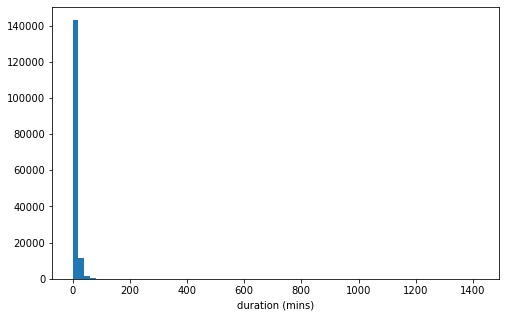

In [47]:
# set color and bins and plot HISTOGRAM
color=sb.color_palette()[4]
bins = np.arange(0, bike['duration_min'].max()+ 20,20)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_min',bins=bins);
plt.xlabel('duration (mins)');


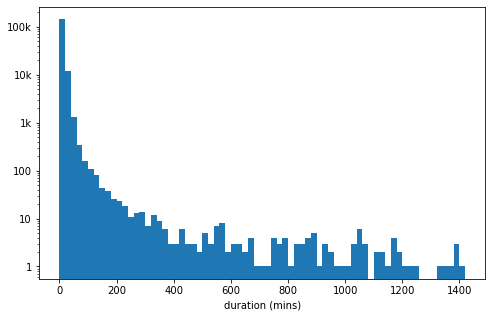

In [48]:
# set bins and plot the log transform histogram
bins = np.arange(0, bike['duration_min'].max()+ 20,20)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_min',bins=bins);
plt.xlabel('duration (mins)');
plt.yscale('log')
plt.yticks([10**0, 10**1,10**2,10**3,10**4,10**5], ['1','10','100','1k','10k','100k']);
# plt.xlim(800, 1400)

1. the majority of the distribution of the duration is within the first 100 mins, with the rest of it being so small that they cannot be seen.
2. On a log scale, the distribution is still multimodall with the peak between 0 and 20. The graph cuts between 1260 to 1320 and continues till 1420.

In [49]:
duration_mean = np.mean(bike['duration_min'])
duration_sd = np.std(bike['duration_min'])
duration_mode = bike['duration_min'].value_counts().index[0]

# bike[bike['distance'] > distance_mean + (4*distance_sd)]
duration_skew = (duration_mean - duration_mode)/duration_sd
duration_skew

0.23261881372872467

next, we plot for the distributions for the other numeric variables

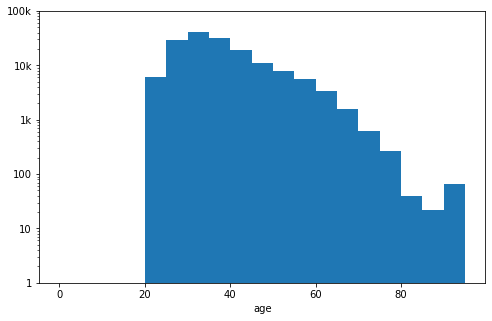

In [50]:
# set bins and plot histogram
bins = np.arange(0, bike['age'].max()+ 5,5)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'age',bins=bins);
plt.xlabel('age');
plt.yscale('log')
plt.yticks([10**0, 10**1,10**2,10**3,10**4,10**5], ['1','10','100','1k','10k','100k']);
# plt.xlim(800, 1400)

1.The age distribution is a bimodal one with the highest peak between age 30 to 35. from there, it ramps down and the next peak coming at the end of the graph from 90 to 95.

In [51]:
age_mean = np.mean(bike['age'])
age_sd = np.std(bike['age'])
age_mode = bike['age'].value_counts().index[0]

# bike[bike['distance'] > distance_mean + (4*distance_sd)]
age_skew = (age_mean - age_mode)/age_sd
age_skew

0.32489149744619955

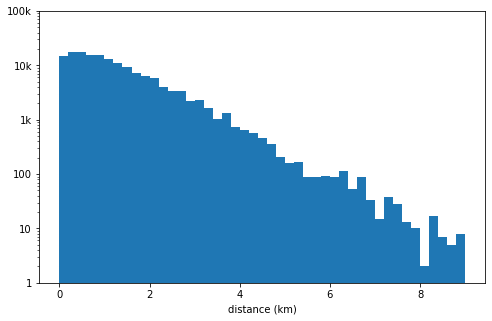

In [52]:
# set bins and plot histogram
bins = np.arange(0, bike['distance'].max()+ 0.2,0.2)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'distance',bins=bins);
plt.xlabel('distance (km)');
plt.yscale('log')
plt.yticks([10**0, 10**1,10**2,10**3,10**4,10**5], ['1','10','100','1k','10k','100k']);
# plt.xlim(800, 1400)

The distribution of the distance feature is a unimodal distribution, starting from 0, peaking before 5km before gradually descending till it ends at 10 km.the distribution then scatters accross 10 and 20 and then disappears completely between 20 and 65, before a single bar pops up justbefore 70

In [53]:
distance_mean = np.mean(bike['distance'])
distance_sd = np.std(bike['distance'])
distance_mode = bike['distance'].value_counts().index[0]

# bike[bike['distance'] > distance_mean + (4*distance_sd)]
distance_skew = (distance_mean - distance_mode)/distance_sd
distance_skew

0.4054361086064044

In [54]:
bike.describe()

,distance,duration_min,age,speed
count,157205.000000,157205.000000,157205.000000,157205.000000
mean,1.227861,11.170287,37.222207,0.137556
std,1.030648,26.525399,9.917825,0.083436
min,0.010000,1.000000,21.000000,0.000012
25%,0.480000,5.000000,30.000000,0.070000
50%,0.960000,8.000000,35.000000,0.135714
75%,1.680000,13.000000,42.000000,0.194286
max,8.910000,1409.000000,95.000000,0.680000


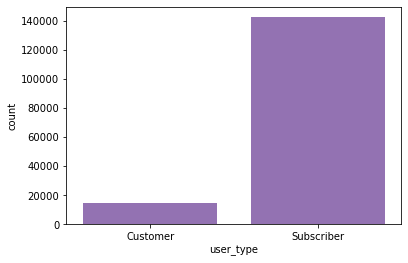

In [55]:
# plot bar chart
sb.countplot(data=bike, x='user_type', color=color);

The count of subscribers is almost 160,000, which is 8 times more than the number of customers whose count is almost 2,000

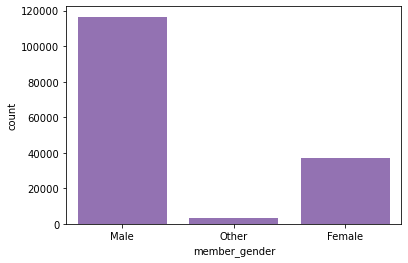

In [56]:
# plot bar chart
sb.countplot(data=bike, x='member_gender', color=color);

Most menbers are males with a count greater than 120,000, with the count of females significantly lower at 40,000 and thet count of other genders not upto 10,000

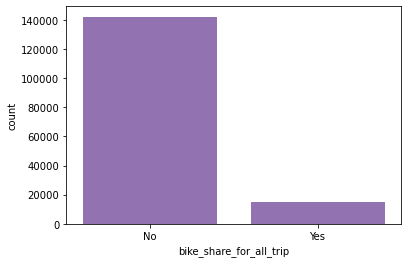

In [57]:
# plot bar chart
sb.countplot(data=bike, x='bike_share_for_all_trip', color=color);

Most of the users did not use bike share for all their trips as evident in their numbers almost reaching 160,000 and the people that used bike share only almost reaching 20000.
This will be an interesting feature because i guess people who used bike share for all their trips will spend longer time on bikes than people who did not use it for all their trips.

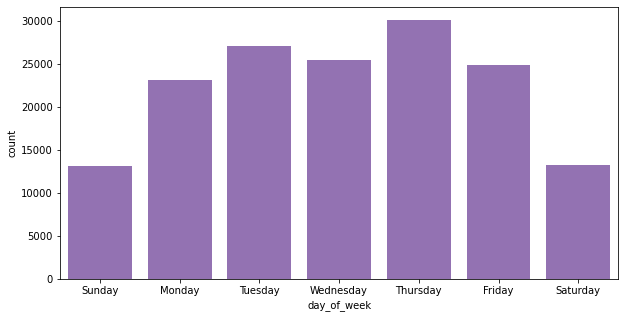

In [58]:
# plot bar chart
plt.figure(figsize=(10,5))
sb.countplot(data=bike, x='day_of_week', color=color);

thursday has the highest number of traffic,closely followed by tuesday, with saturdays and sundays having the least amount of traffic

the plot has multiple station names hence impossible to read

In [59]:
bike.end_station_name.nunique()

329

The number of stations are too much for meaningful insight to be gained from its plot.

In [60]:
bike.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,distance,duration_min,day_of_week,age,speed
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,0.51,869,Thursday,38,0.000587
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,1.90,1030,Thursday,50,0.001845
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,0.17,608,Thursday,33,0.000280
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,1.32,26,Thursday,48,0.050769
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,3.07,29,Thursday,63,0.105862


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The counts of the dataframe were very large values , so i plotted the distributions of the numeric features of the dataframe with the log transform of the count. The 3 plots were unimodal and positively skewed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration_min feature and the distance feature were long tailed plots. i had to create a speed column in the dataframefrom the division of the distance column by the duration_min column. this was used to identify rows with abnormal speed, distance and duration_min sop that they can be removed.

## Bivariate Exploration


In [61]:
# correlation plot
num_var = ['distance', 'duration_min','age']
cat_var = ['user_type','member_gender', 'bike_share_for_all_trip', 'day_of_week' ]
cat_var_x = ['user_type','member_gender', 'bike_share_for_all_trip' ]
num_var_x = ['distance', 'log_duration','age']

In [62]:
bike['log_duration'] = np.log(bike['duration_min'])

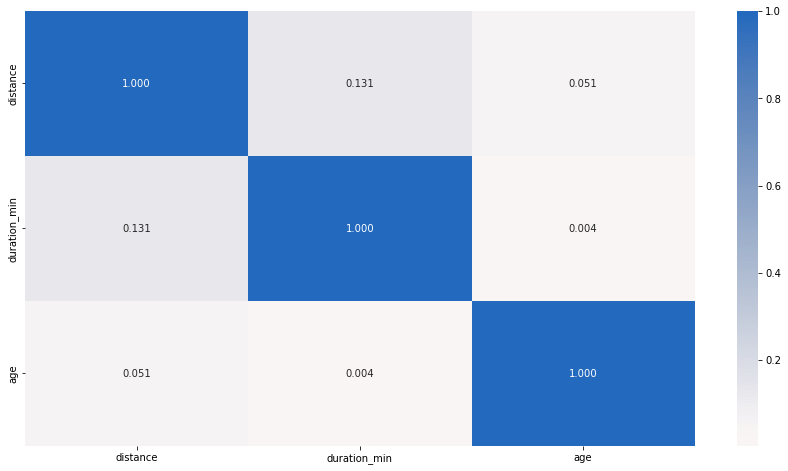

In [63]:
plt.figure(figsize = [15, 8])
sb.heatmap(bike[num_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

From the correlation plot, it is clearly evident that there is slight corelation between between the numeric variables. Distance and duration_min have a much higher corellation with each other compared to what they each have with age. This is not surprising given that the values range of age are much higher values compared to the values of either distance or duration_min.

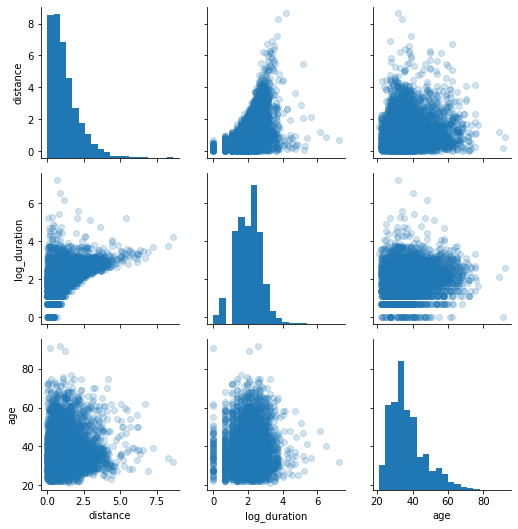

In [64]:
# gridmap
samples = np.random.choice(bike.shape[0], 5000, replace = False)
bike_samp = bike.iloc[samples,:]

g = sb.PairGrid(data = bike_samp, vars = num_var_x);
g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter, alpha=0.2);

From the distribution plot of the numeric variables, it is clearly difficult to identify a strong correlation between the features as expected. The value range for the duration_min is large compared to the remaining numeric variables. It will be transformed and investigated further.

next we look at the corellation between the categorical and the numerical variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


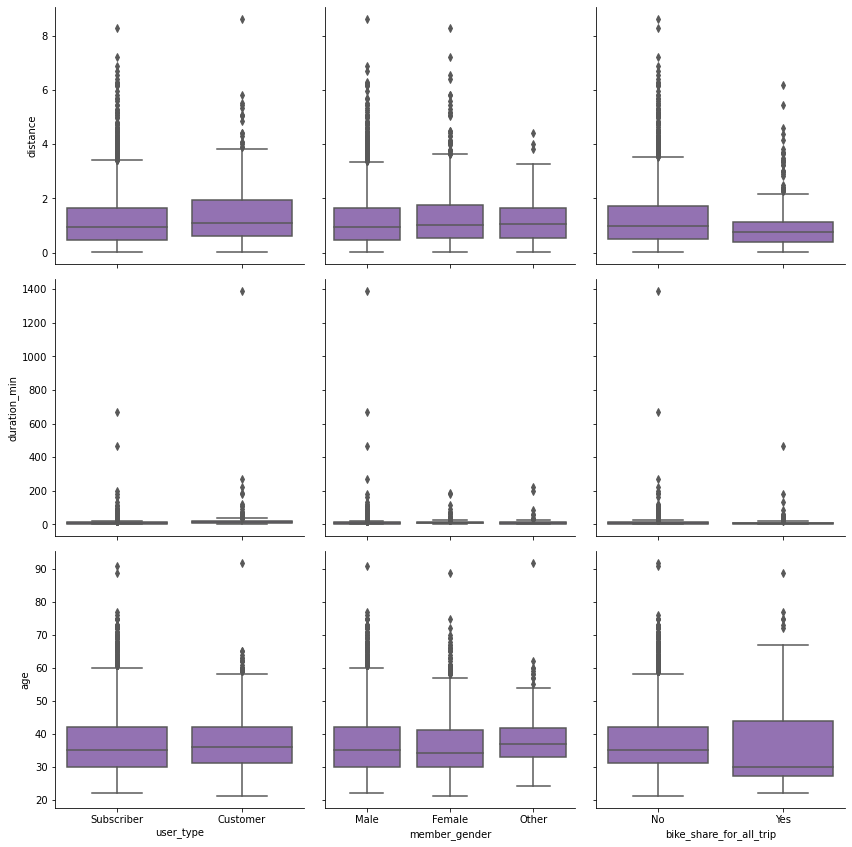

In [65]:
# gridmap of boxplots

g = sb.PairGrid(data=bike_samp, x_vars=cat_var_x, y_vars=num_var, size=4);
g.map(sb.boxplot, color=color);

In order to avoid overplotting, the day_0f_week variable is not a part of the pairgrid as its on a seperate plot.

For user types, It appears that customers which are less than subscribers ride for longer distances than subscribers and are slightly older than subscribers as well.

For member gender, females who comes behind males in terms of population seem to drive the longest disance, and other genders not males drive the least distance. Other gender are the oldest and females are the youngest.

For bike_share_for_all_trips, No went longer distances and were older than yes.

The duration_min is the feature that we will be focusing on to answer our question. feature plots were difficult to interprette, hence they will be plotted seperately.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


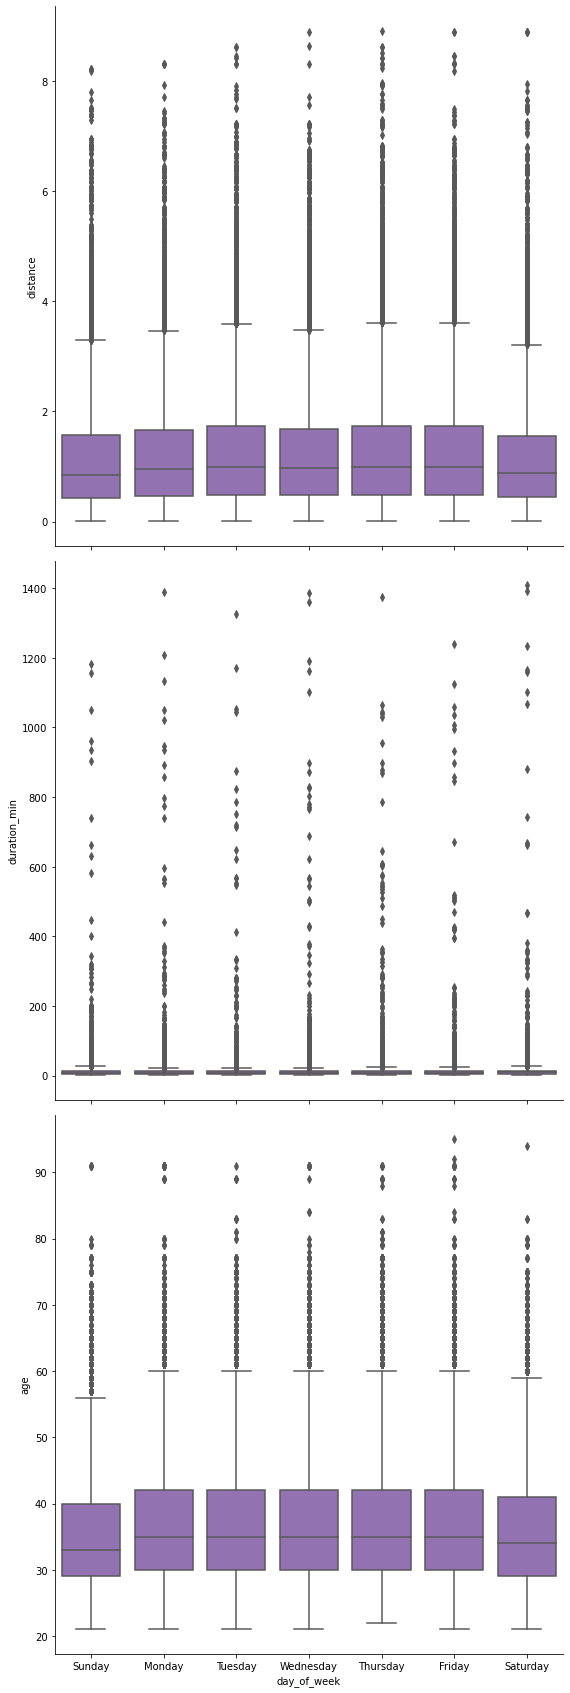

In [66]:
# sb.set(rc={"figure.figsize":(10, 10)})
g = sb.PairGrid(data=bike, x_vars='day_of_week', y_vars=num_var, size= 8);
g.map(sb.boxplot, color=color);

people travelled the longest distance on friday, and distances for monday to thursday are quite indistinguishable. Sunday was when people travelled the least distance.
Bikers for friday apperas to be the oldest with bikers from monday through to thursday all having slightly similar ages. Bikers for sunday appear to be the youngest of all the days.

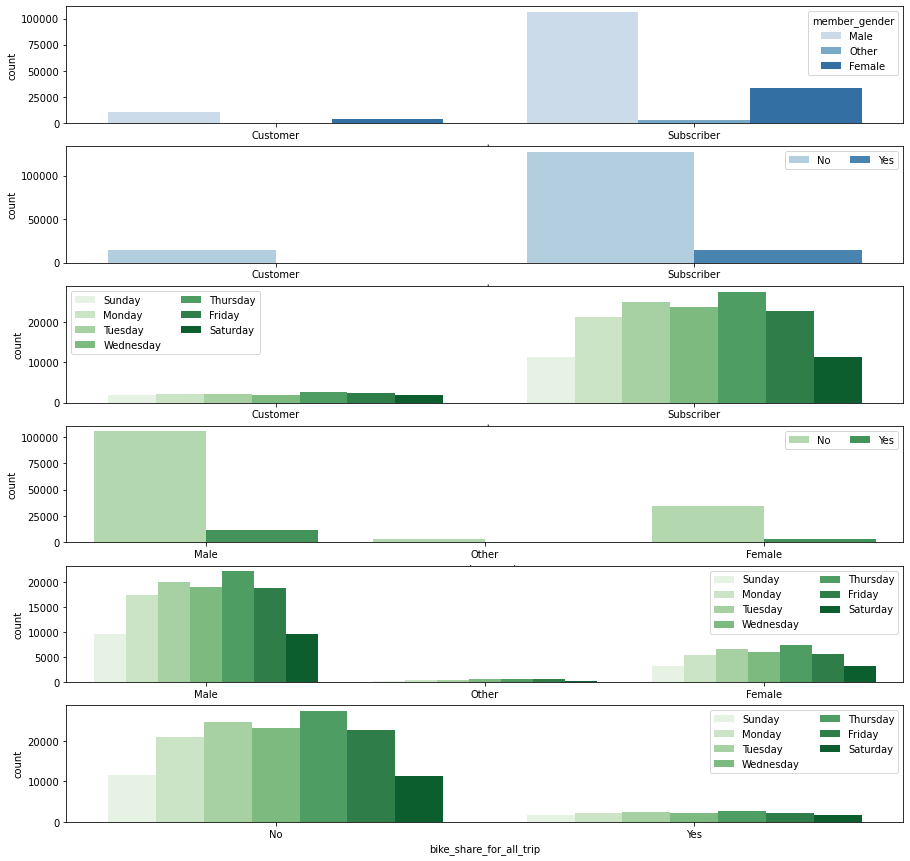

In [67]:
plt.figure(figsize = [15, 15])

# subplot 1: color vs cut
plt.subplot(6, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(6, 1, 2)
sb.countplot(data = bike, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(6, 1, 3)
sb.countplot(data = bike, x = 'user_type', hue = 'day_of_week', palette = 'Greens')
ax.legend(loc = 0, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(6, 1, 4)
sb.countplot(data = bike, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(6, 1, 5)
sb.countplot(data = bike, x = 'member_gender', hue = 'day_of_week', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(6, 1, 6)
sb.countplot(data = bike, x = 'bike_share_for_all_trip', hue = 'day_of_week', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

FOr this plot, The full data is used instead of a sample. Most of the subscribers and customers are predominantly males. Both customers and subscribers did not use bikeshare for all trips. Thursday was when subscribersnad customers biked.This is abbly supported by our earlier finding wher thursday was the bussiest day. All the genders (male,female and others) did not use bike share for all their trips. Most trips were made on thursday by males and females as well. MOst people who used bike share for all their trips, made the trip on thursday. This is also the same for most people who did not use bike share for all their trips.

In [68]:
"""I created a mask for people that used bike share for all trips and for those that did not use"""

bike_share = bike.copy()

bike_share.loc[bike_share.bike_share_for_all_trip == 'Yes', 'bike_share_for_all_trip'] = 1
bike_share.loc[bike_share.bike_share_for_all_trip == 'No', 'bike_share_for_all_trip'] = 0
bike_share.bike_share_for_all_trip = bike_share.bike_share_for_all_trip.astype(int)


all_trips = bike_share.bike_share_for_all_trip == True
not_all_trips = bike_share.bike_share_for_all_trip == False


lets look at the duration in min for all the categorical features

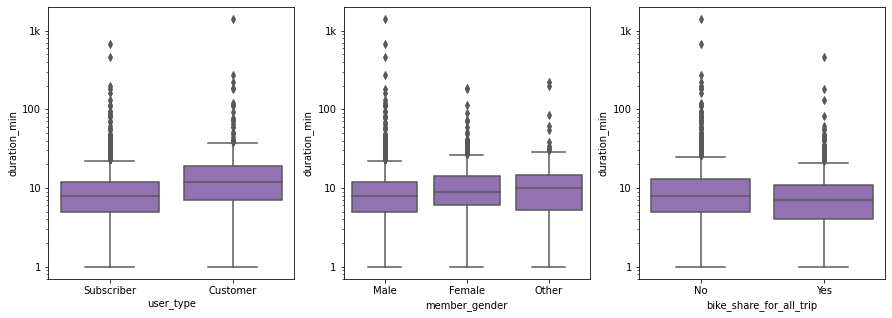

In [69]:
plt.figure(figsize=(15,5))

plt.subplot(1,3, 1)
sb.boxplot(data=bike_samp, x='user_type', y='duration_min', color=color);
plt.yscale('log');
plt.yticks([10**0, 10**1,10**2,10**3], ['1','10','100','1k',]);

plt.subplot(1,3, 2)
sb.boxplot(data=bike_samp, x='member_gender', y='duration_min', color=color);
plt.yscale('log');
plt.yticks([10**0, 10**1,10**2,10**3], ['1','10','100','1k',]);


plt.subplot(1,3, 3)
sb.boxplot(data=bike_samp, x='bike_share_for_all_trip', y='duration_min', color=color);
plt.yscale('log');
plt.yticks([10**0, 10**1,10**2,10**3], ['1','10','100','1k',]);

since the correlation between distance and duration_in_min is very very small, its still relevant here as seen as customers spend more time on the bikes than subscribers, and other genders spend more time than males and females. Also, most people who spend more timne on bikes did not use bike share for all trips.

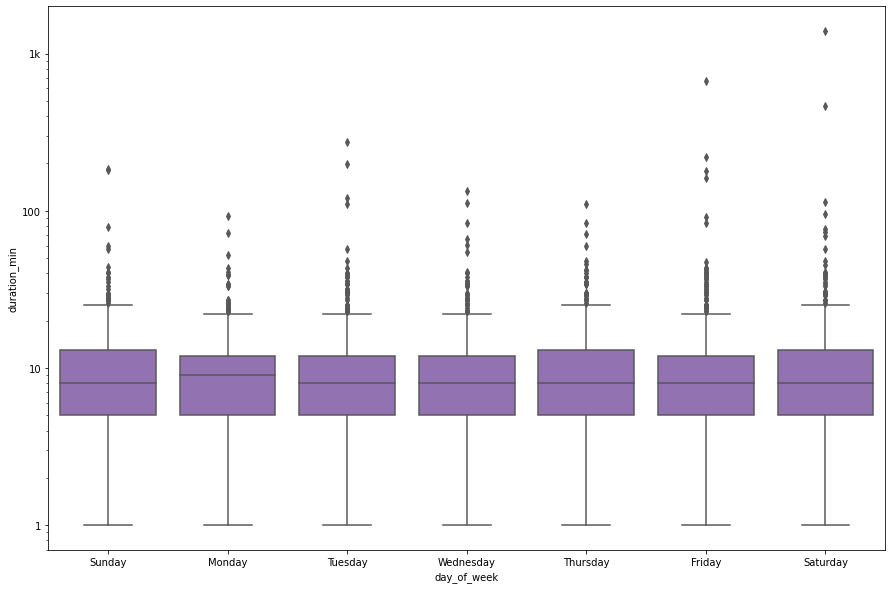

In [70]:
plt.figure(figsize=(15,10))
# plt.subplot(1,2, 2)
sb.boxplot(data=bike_samp, x='day_of_week', y='duration_min', color=color);
plt.yscale('log');
plt.yticks([10**0, 10**1,10**2,10**3], ['1','10','100','1k',]);

the bikers went almost the same distance for all the days

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The distance and the duration features had negligible correlation with the age feature. 
Due to duration having a larger range of values compared to the rest of the features, its normal plots were difficult to interprete,
hence it had to be log transformed. When plotted against a sample, it was observed that when plotted against a sample, 
the subscribers spent more time on the bike than the subscribers. This was interesting because there more subscribers than 
there were customers hence a plot was made using the entire dataset and it was observed that subscribers spent more time than 
customers. Also, all the days of the week had almost the same time spent on bike. 
It was also observed that bikers went almost the same distance for each day if the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Thursday had more subscribers and customers than the rest of the week. Thursday also had the most males, females and other 
gender than any other day of the week. Most people who used bike share for all their trips did so an thursday, so also did people 
who did not use bike share for all their trips. These observations only supported our earlier observations  were we saw that 
thursday had the most traffic of all the days.

## Multivariate Exploration

Here i will be looking at how the categorical variables affect the relationship between the duration and the distance

In [71]:
bike['log_duration'] = np.log(bike['duration_min'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


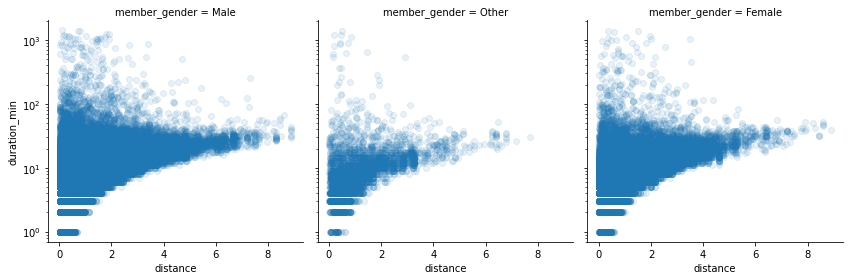

In [72]:
g = sb.FacetGrid(data=bike, col='member_gender', col_wrap=3, size=4, margin_titles=True);
g.map(plt.scatter, 'distance', 'duration_min', alpha = 0.1);
plt.yticks([10**0, 10**1,10**2,10**3,10**4,10**5], ['1','10','100','1k','10k','100k']);
plt.yscale('log')
# g.set_xlabels('distance')
# g.set(ylabel='duration(min)')
# plt.show()

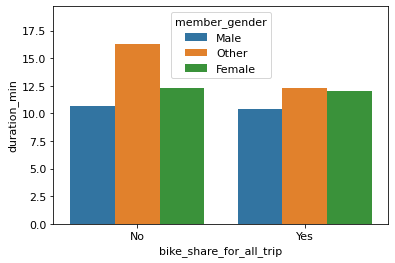

In [73]:
# plt.figure(figsize=(15,14))
plt.rcParams.update({'font.size': 11}) # must set in top
ax = sb.barplot(data=bike, x='bike_share_for_all_trip', y='duration_min', hue='member_gender', errwidth=0)
# ax.set(yscale='log')

All the genders who did not use bike for all their trips spent more time on the bike. Males who used bike for all their trips spent the least time in their bikes and other gender who  did not use bike share for all their trips spent the most time on the bikes.

In [74]:
bike[['duration_min', 'bike_share_for_all_trip']].query('bike_share_for_all_trip == "No"').mean()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1864\3304235084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bike[['duration_min', 'bike_share_for_all_trip']].query('bike_share_for_all_trip == "No"').mean()


duration_min    11.205771
dtype: float64

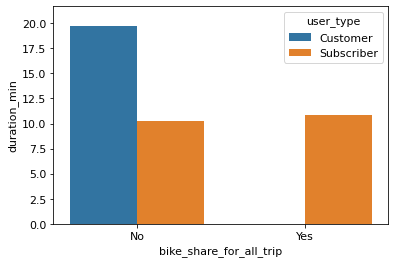

In [75]:
ax = sb.barplot(data=bike, x='bike_share_for_all_trip', y='duration_min', hue='user_type', errwidth=0)


All customers did not use bike share for all their trips hence they spent the most time on bikes of all the user types. Subscribers who used bike share for all their trips spent slightly more time than subscribers who did not use bike share for all their trips.

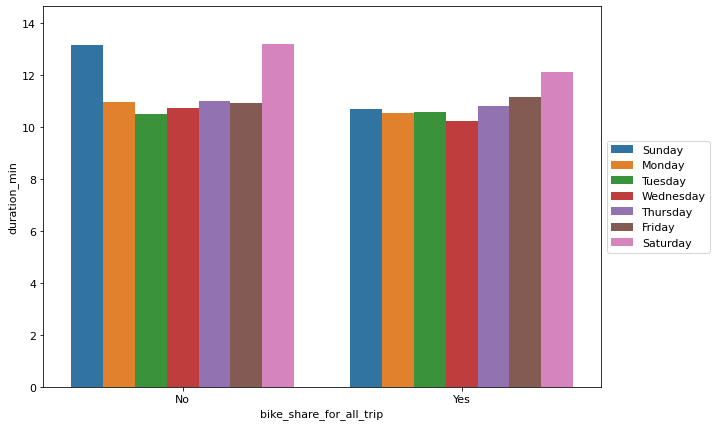

In [76]:
plt.figure(figsize=(10,7))

ax = sb.barplot(data=bike, x='bike_share_for_all_trip', y='duration_min', hue='day_of_week', errwidth=0);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
# plt.legend(loc='upper right')

People whodid not use bike share for all their trips and rode on saturdays and sundays, spent the most time on bikes out of all the days. This is both for people who used bike share for all their trips and for people who did not use.

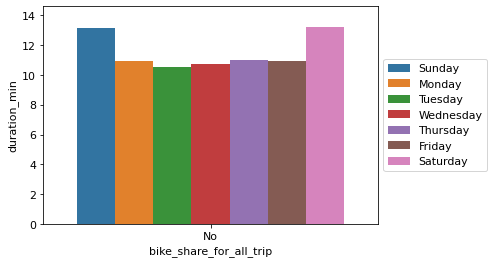

In [77]:
bike_share_no = bike.where(bike['bike_share_for_all_trip'] == 'No')

ax = sb.barplot(data=bike_share_no, x='bike_share_for_all_trip', y='duration_min', hue='day_of_week', errwidth=0);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

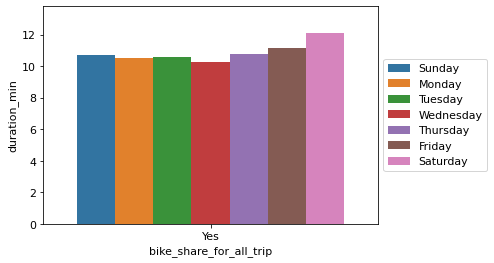

In [78]:
bike_share_yes = bike.where(bike['bike_share_for_all_trip'] == 'Yes')

ax = sb.barplot(data=bike_share_yes, x='bike_share_for_all_trip', y='duration_min', hue='day_of_week', errwidth=0);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> males spent the least time of any gender using bike share for all trips and not using bike share for all trips. The range of minutes 
for genders who used bike share for all their trips ranges between 10 and 12 min, while the highest time was above 15 min. The
difference between the time here is significant.
The entirety of users who used bike share for all their trips were subscribers as all the customers found it convinient to not use 
bike share for all their trips. These customers spent the most time on the bike at almost 20 mins. this is double the time spent by 
subscribers.Both the ones that used bike share forall their trips and the one that did not. 
for users that did not use bike share for all their trips, saturdays and sundays had people spending 13 mins on the bike. This is the
most for both people who used bike share for all their trips and peoplre who did not use it for all their trips.
Subscribers and  males had the smallest time spent on the bike even though they the bulk of their respective features, While customers and 
other genders spent the most time on the bikes even though they made up the minority of their respective features. This is strengthened by the fact that they were also higher in their respective distances.
### Were there any interesting or surprising interactions between features?

> The 3 numerical variables used for the analysis had very small correlation, with age having a negligible corellation.Hence The iinteraction between these numerical variables being very small.

## Conclusions
>A plot of the duration showed a single bar with a long and almost invisible tail, hence the need to plot a log transform of the duration. The plot 
of the age and distance each was unimodal.There were more subscribers than customers, more males than any other gender, and most
bike traffic was on thursday. The numeric variables all had less significant correlation with each other. On a sample data of 5000, Customers went further than subscribers
so did other genders and people who did not use bike share for all their trips.Subscribers and  customers were the same age. Other genders and 
people who did not use bike share sor all trips were older. The days had almost the same distance with sunday having the least age.
Most subscribers and customers were males and did not use bike share for all trips, with thursdays having their highest sppearance.